## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2023:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOGL)
* Meta (NASDAQ:META).

Using Pandas, yfinance, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2023. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import numpy as np
import pandas as pd

#### Step 2: Import Financial Package
Import the `yfinance` module as `yf`. (you can install the `yfinance` package by entering `pip3 install yfinance` in the command line or `!pip3 install yfinance` in the Jupyter Notebook)

You can learn more about the yfinance package by visiting its [github homepage](https://github.com/ranaroussi/yfinance#readme). Also take a look at the [dependency requirements](https://github.com/ranaroussi/yfinance#requirements) to check that your Python, Pandas, and Numpy versions are compatible for working with yfinance.

In [4]:
!pip3 install yfinance
import yfinance as yf 

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2023 named `start_date` and a datetime object representing July 1st, 2023 named `end_date`.
#### Step 3: Retrieve Data
Call the function `yf.download()` to pull historical data for multiple stocks. `.download()` should take three arguments &mdash; the first is a positional argument that holds the list of stock symbols for which we'd like to download data. The second and third arguments should be keyword arguments `start` and `end`, which should be set to `start_date` and `end_date` respectively. Save the result to a variable called `stock_data`. You can read more about the `.download()` method on the [yfinance wiki](https://github.com/ranaroussi/yfinance/wiki/Tickers#download)
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [10]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOGL", "META"]


In [11]:
from datetime import datetime

start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 1)

In [17]:
stock_data = yf.download(symbols, start=start_date, end=end_date)
stock_data.head()

[*********************100%***********************]  5 of 5 completed


Price            Close                                                \
Ticker            AAPL       AMZN      GOOGL        META        MSFT   
Date                                                                   
2023-01-03  123.211205  85.820000  88.451683  123.874695  233.985657   
2023-01-04  124.482040  85.139999  87.419472  126.486450  223.750366   
2023-01-05  123.161942  83.120003  85.553574  126.059425  217.118896   
2023-01-06  127.693565  86.080002  86.685028  129.118057  219.677704   
2023-01-09  128.215698  87.360001  87.359932  128.571869  221.816589   

Price             High                                                ...  \
Ticker            AAPL       AMZN      GOOGL        META        MSFT  ...   
Date                                                                  ...   
2023-01-03  128.954553  86.959999  90.367210  125.493393  240.011582  ...   
2023-01-04  126.747861  86.980003  89.970198  128.154797  227.432323  ...   
2023-01-05  125.871071  85.419998  86.913303  127.628467  222.236544  ...   
2023-01-06  128.353606  86.400002  87.032409  129.425904  220.488325  ...   
2023-01-09  131.427258  89.480003  89.374715  132.027724  225.840395  ...   

Price             Open                                                \
Ticker            AAPL       AMZN      GOOGL        META        MSFT   
Date                                                                   
2023-01-03  128.343772  85.459999  88.918152  121.968015  237.403930   
2023-01-04  125.004162  86.550003  89.672445  126.496375  226.856104   
2023-01-05  125.240583  85.330002  86.814054  125.255039  221.894711   
2023-01-06  124.137225  83.029999  86.139157  128.075338  217.792778   
2023-01-09  128.530950  87.459999  87.697386  130.250148  221.162236   

Price          Volume                                          
Ticker           AAPL      AMZN     GOOGL      META      MSFT  
Date                                                           
2023-01-03  112117500  76706000  28131200  35528500  25740000  
2023-01-04   89113600  68885100  34854800  32397100  50623400  
2023-01-05   80962700  67930800  27194400  25447100  39585600  
2023-01-06   87754700  83303400  41381500  27584500  43613600  
2023-01-09   70790800  65266100  29003900  26649100  27369800  

[5 rows x 25 columns]

In [18]:
stock_data['Close']

Ticker,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2023-01-03,123.211205,85.820000,88.451683,123.874695,233.985657
2023-01-04,124.482040,85.139999,87.419472,126.486450,223.750366
2023-01-05,123.161942,83.120003,85.553574,126.059425,217.118896
2023-01-06,127.693565,86.080002,86.685028,129.118057,219.677704
2023-01-09,128.215698,87.360001,87.359932,128.571869,221.816589
...,...,...,...,...,...
2023-06-26,183.048050,127.330002,117.452568,276.538269,322.434113
2023-06-27,185.804565,129.179993,117.442642,285.058716,328.292145
2023-06-28,186.980301,129.039993,119.278755,283.310974,329.548096


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

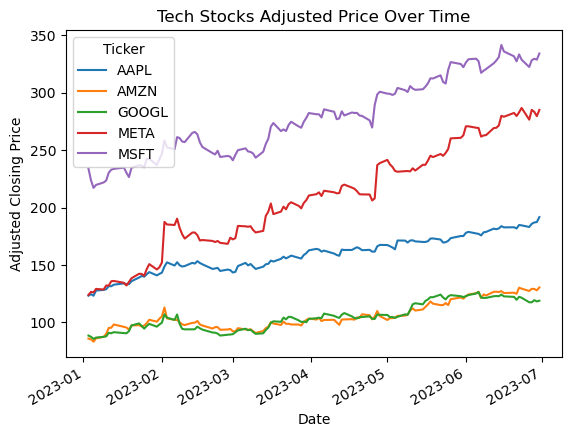

In [20]:
stock_data_closing_prices = stock_data['Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

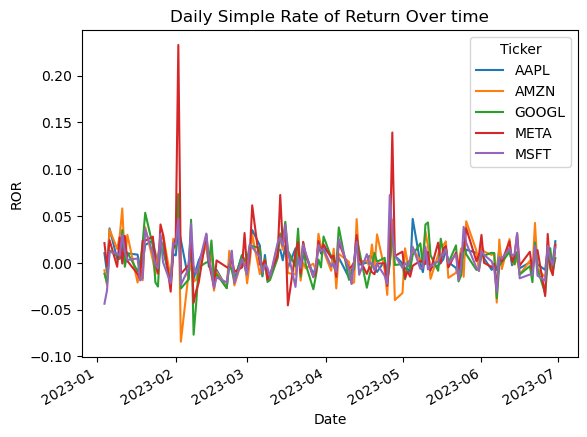

<Figure size 1600x900 with 0 Axes>

In [22]:
stock_data_daily_returns = stock_data['Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

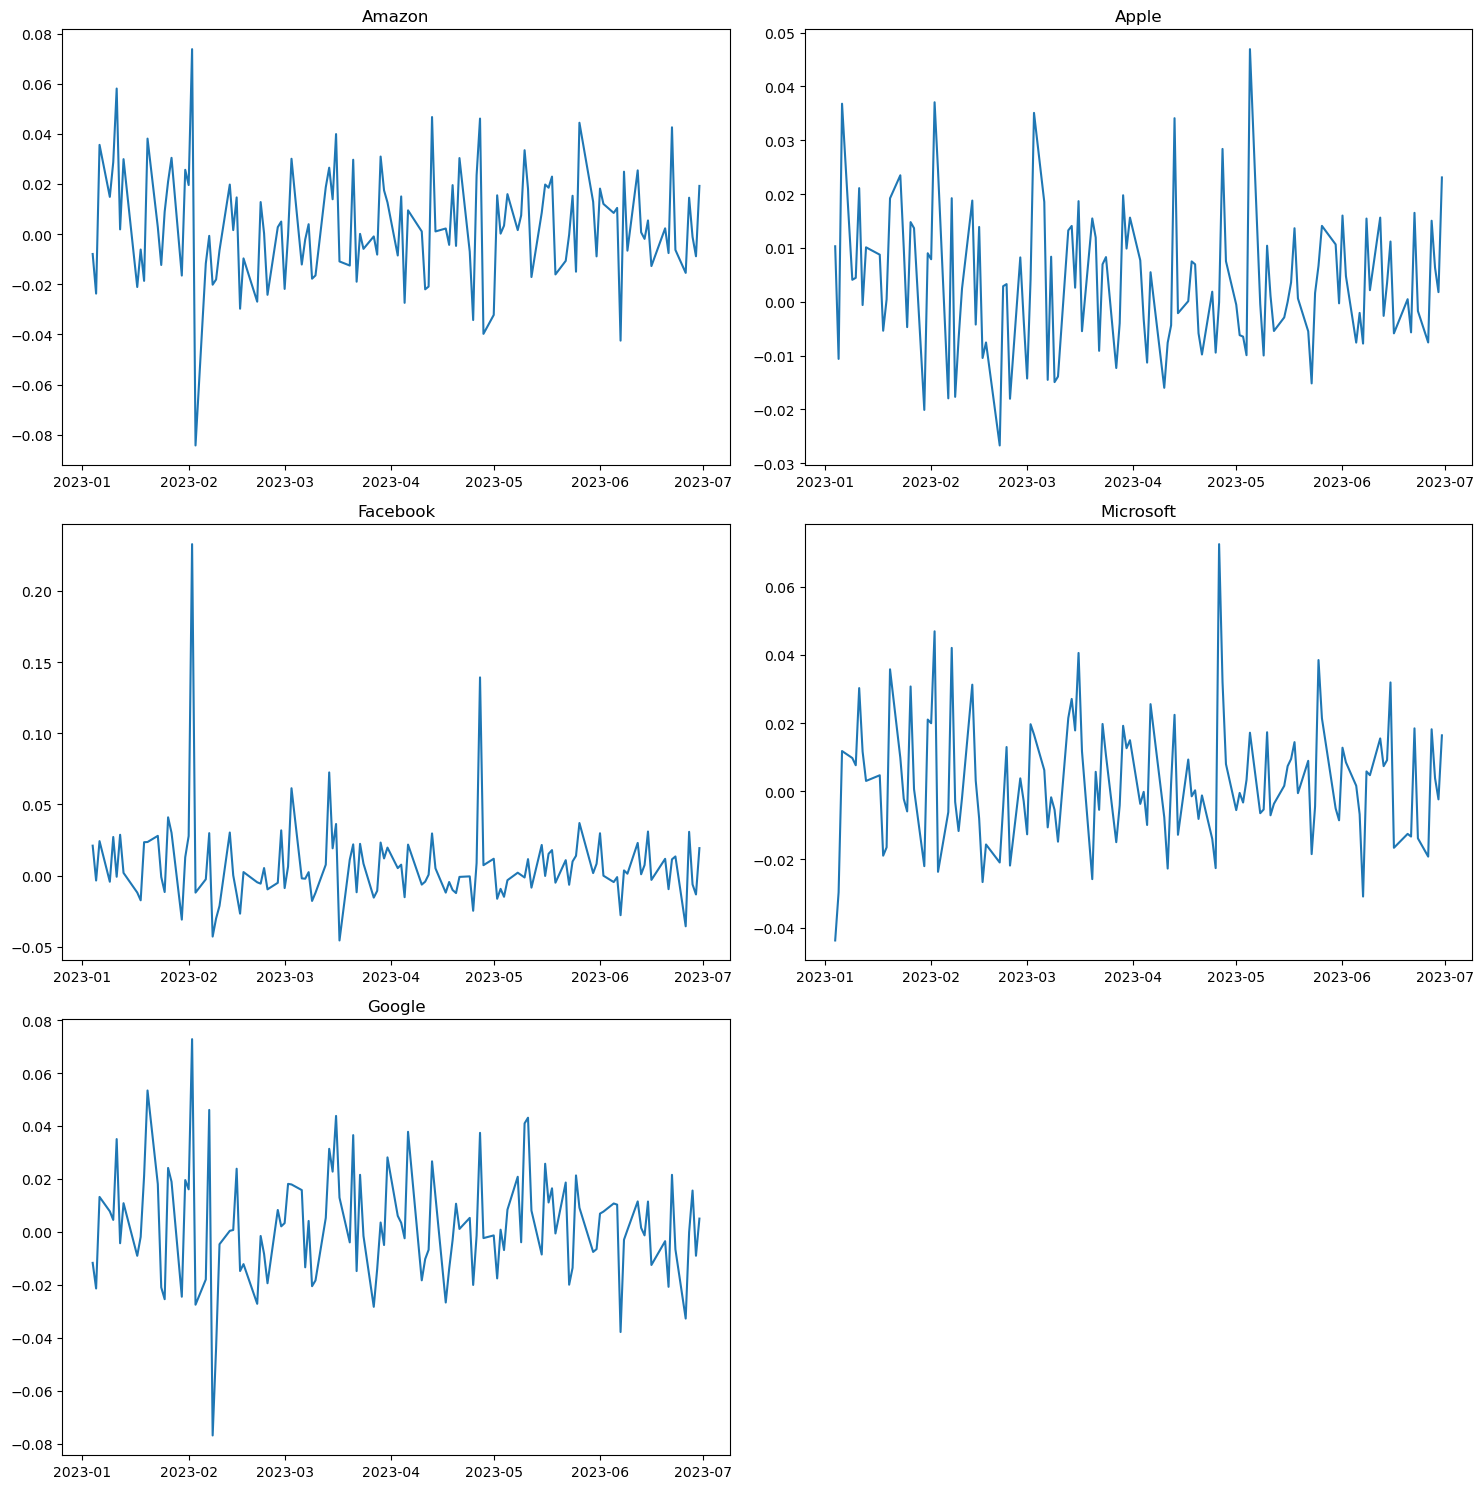

In [24]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Close']['META'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Close']['GOOGL'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [27]:
daily_mean = stock_data_daily_returns.mean()

daily_mean

Ticker
AAPL     0.003682
AMZN     0.003652
GOOGL    0.002619
META     0.007224
MSFT     0.003060
dtype: float64

In [30]:
# daily mean index for the x axis
daily_mean.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object', name='Ticker')

In [31]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[np.float64(0.0036817847487651094),
 np.float64(0.0036520392611041766),
 np.float64(0.002619028187358623),
 np.float64(0.00722353546154223),
 np.float64(0.00306032734028566)]

In [32]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

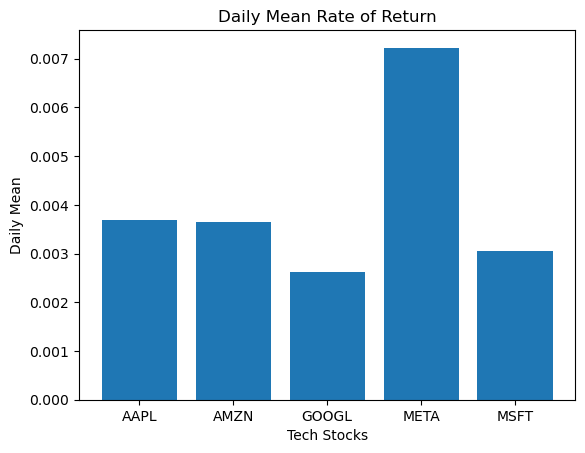

In [35]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech Stocks")
plt.ylabel("Daily Mean")
plt.title("Daily Mean Rate of Return")

# show graphic
plt.show()

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [36]:
stock_var = stock_data_daily_returns.var()

stock_var

Ticker
AAPL     0.000171
AMZN     0.000500
GOOGL    0.000440
META     0.000931
MSFT     0.000324
dtype: float64

In [38]:
x_pos_var = np.arange(len(stock_var.keys()))
x_pos_var

array([0, 1, 2, 3, 4])

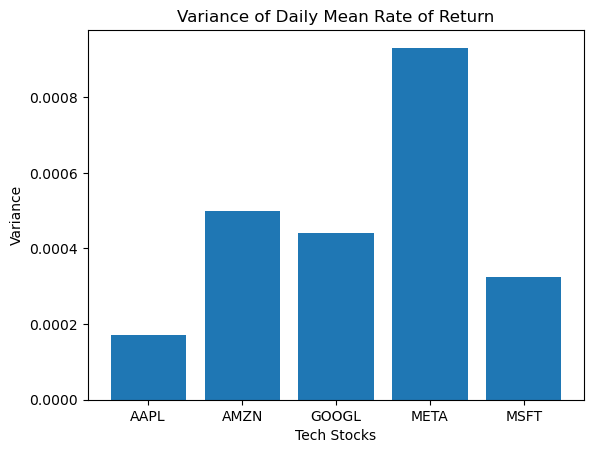

In [40]:
# plot bars
plt.bar(x_pos_var, stock_var)
 
# create names on the x-axis
plt.xticks(x_pos_var, stock_var.keys())

# label chart
plt.xlabel("Tech Stocks")
plt.ylabel("Variance")
plt.title("Variance of Daily Mean Rate of Return")

# show graphic
plt.show()

In [41]:
# Based on the variance, the META stock would be the riskiest to invest in

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [42]:
daily_std = stock_data_daily_returns.std()
daily_std

Ticker
AAPL     0.013065
AMZN     0.022353
GOOGL    0.020977
META     0.030510
MSFT     0.017993
dtype: float64

In [44]:
daily_std.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object', name='Ticker')

In [45]:
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[np.float64(0.013064865479266993),
 np.float64(0.022352667650670132),
 np.float64(0.020977216040507576),
 np.float64(0.03050999010830805),
 np.float64(0.01799343635715142)]

In [46]:
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

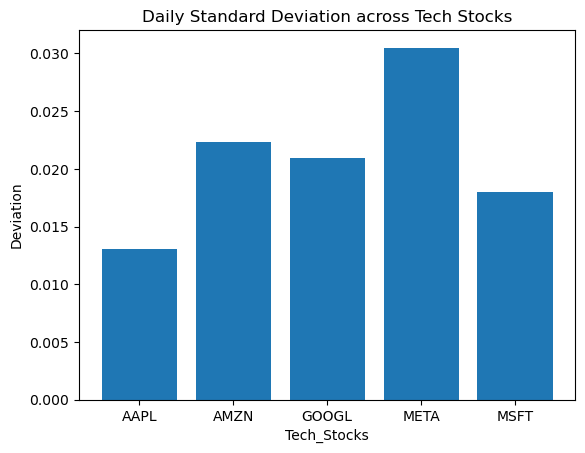

In [48]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("Deviation")
plt.title("Daily Standard Deviation across Tech Stocks")

# show graphic
plt.show()

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?